In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Student_Performance.csv')
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
Hours Studied                       10000 non-null int64
Previous Scores                     10000 non-null int64
Extracurricular Activities          10000 non-null object
Sleep Hours                         10000 non-null int64
Sample Question Papers Practiced    10000 non-null int64
Performance Index                   10000 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
df['Extracurricular Activities'].value_counts()

No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Extracurricular Activities']= le.fit_transform(df['Extracurricular Activities'])
df['Extracurricular Activities']

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int64

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.9886898790682355
0.9889832909573145


In [22]:
y_pred = reg.predict(X_test)
y_pred[:5]

array([54.71185392, 22.61551294, 47.90314471, 31.28976748, 43.00457042])

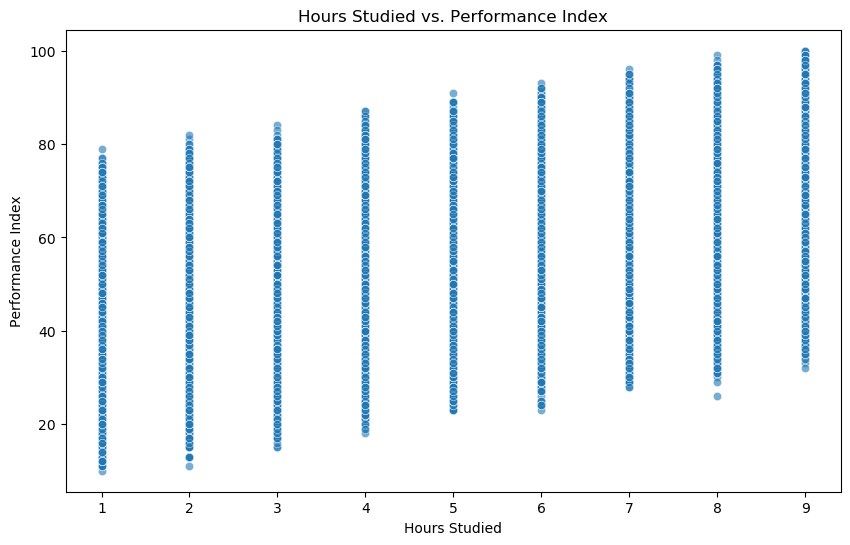

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours Studied', y='Performance Index', alpha=0.6)
plt.title('Hours Studied vs. Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print(mse)
print(r2)

4.082628398521854
0.9887203279837656
